<a href="https://colab.research.google.com/github/alexpho1/DiabetesDataExplore/blob/main/DiabetesPrediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Dataset used to conduct analysis

https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"Healthcare-Diabetes.csv")

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data = data.drop("Id", axis = 1)

In [ ]:
data.describe()

Here we look at each individual predictor to see the overall spreads of the values and counts

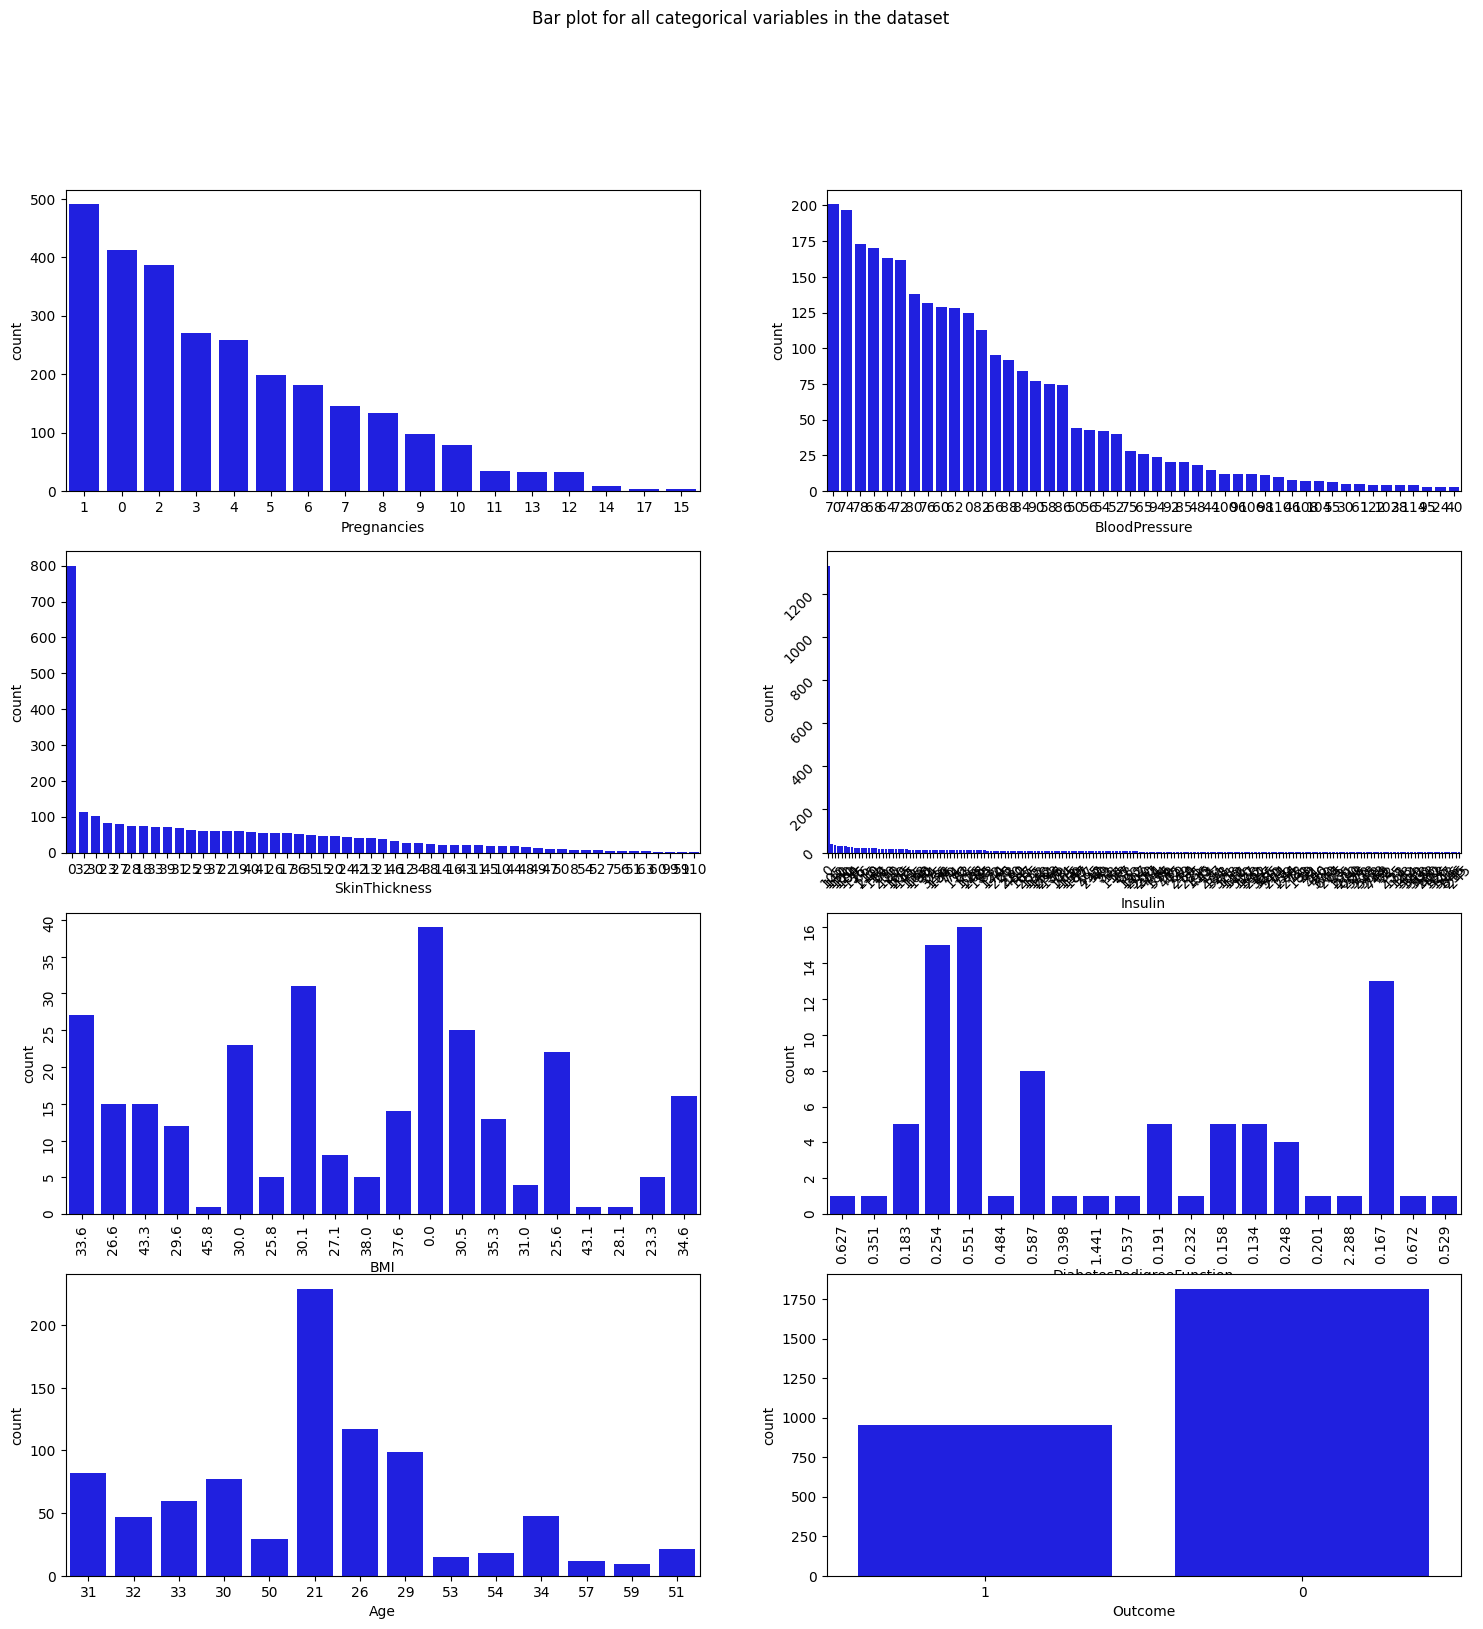

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Pregnancies', data = data, color = 'blue',
              order = data['Pregnancies'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'BloodPressure', data = data, color = 'blue',
              order = data['BloodPressure'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'SkinThickness', data = data, color = 'blue',
              order = data['SkinThickness'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Insulin', data = data, color = 'blue',
              order = data['Insulin'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'BMI', data = data, color = 'blue',
              order = data['BMI'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'DiabetesPedigreeFunction', data = data, color = 'blue',
              order = data['DiabetesPedigreeFunction'].head(20).value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'Age', data = data, color = 'blue',
              order = data['Age'].head(20).value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'Outcome', data = data, color = 'blue',
              order = data['Outcome'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);


In the following step, I created a box and whisker plot to look at counts of the predictor as well as pair it with a box and whisker plot to check for outliers and and skewness.

Pregnancies
Skew : 0.96


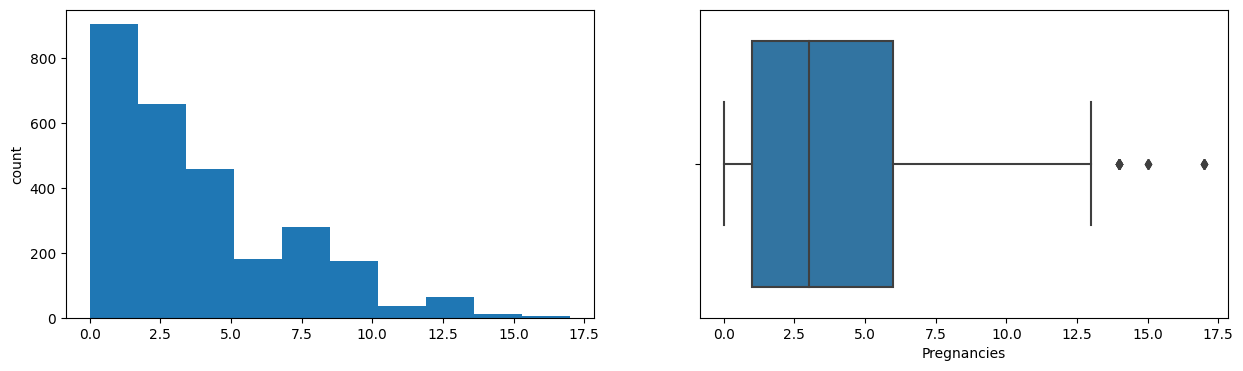

Glucose
Skew : 0.16


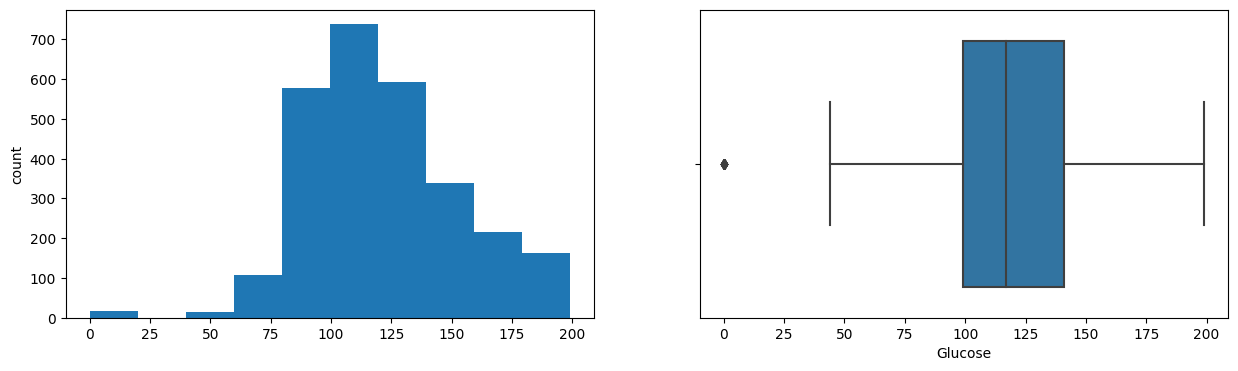

BloodPressure
Skew : -1.85


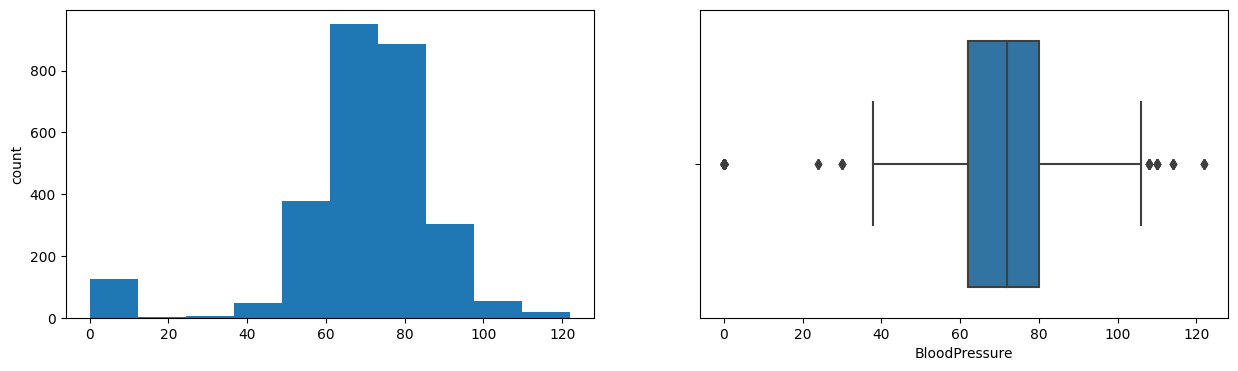

SkinThickness
Skew : 0.18


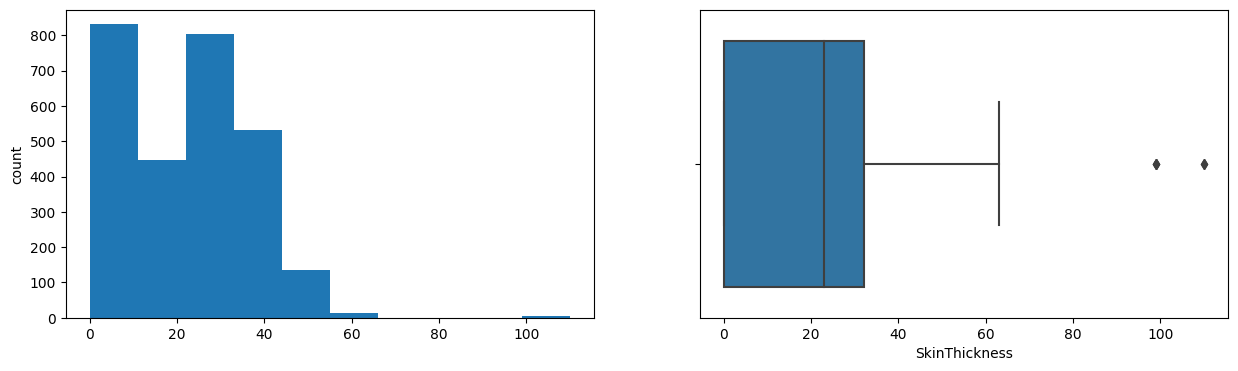

Insulin
Skew : 2.08


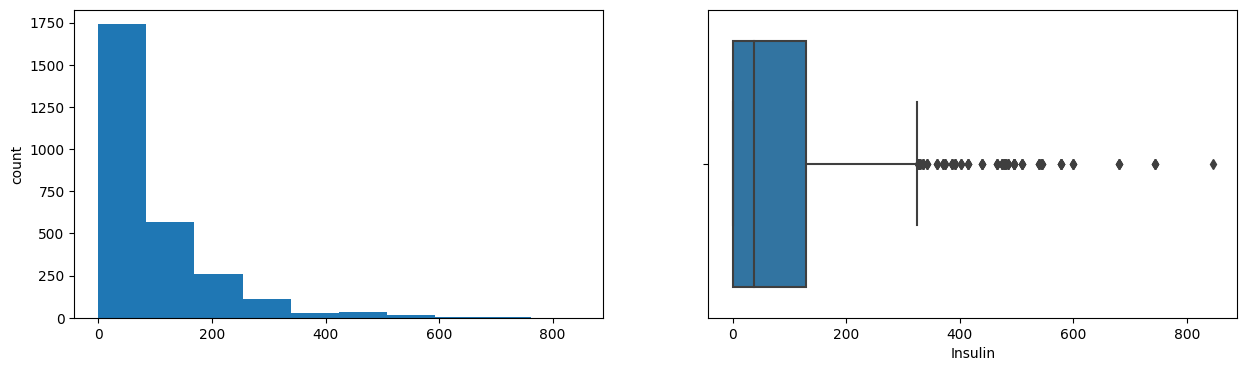

BMI
Skew : -0.18


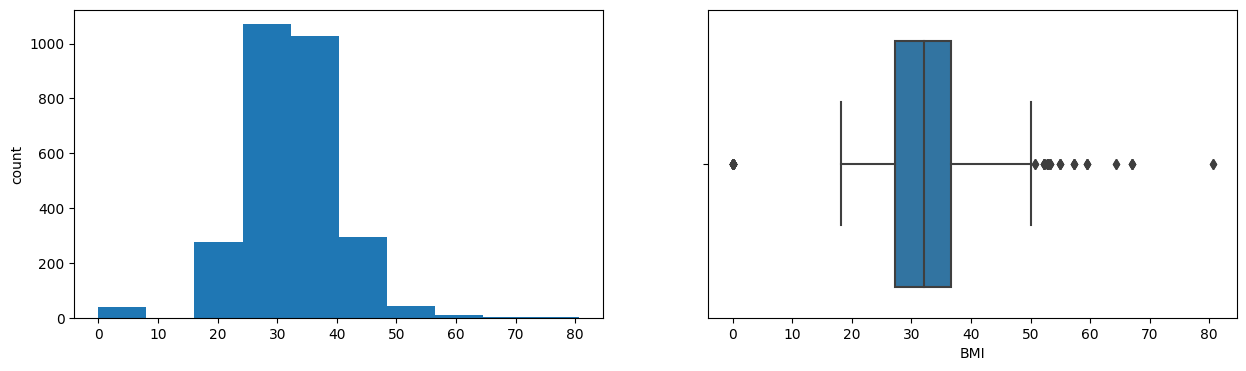

DiabetesPedigreeFunction
Skew : 1.84


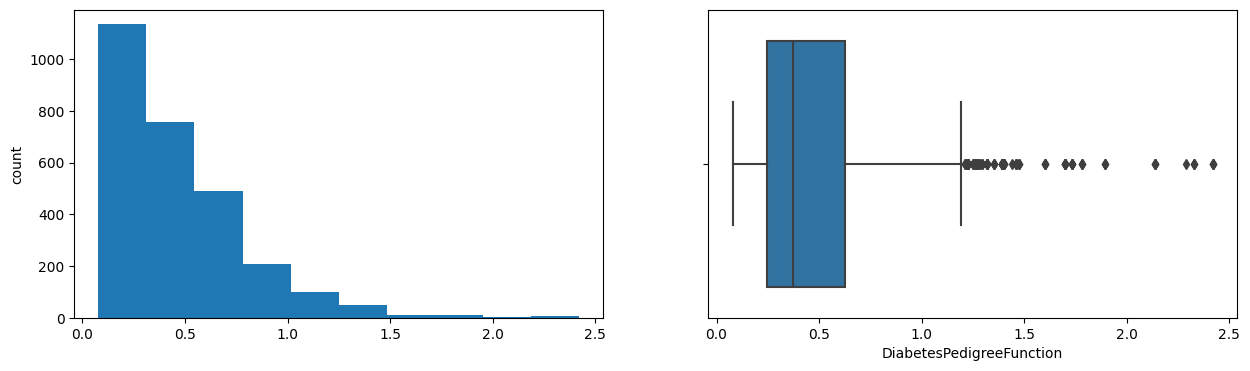

Age
Skew : 1.17


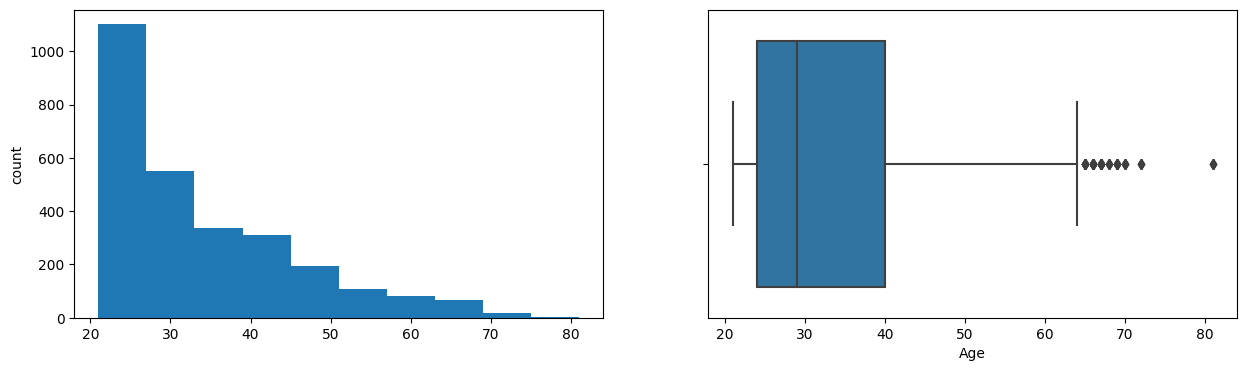

Outcome
Skew : 0.66


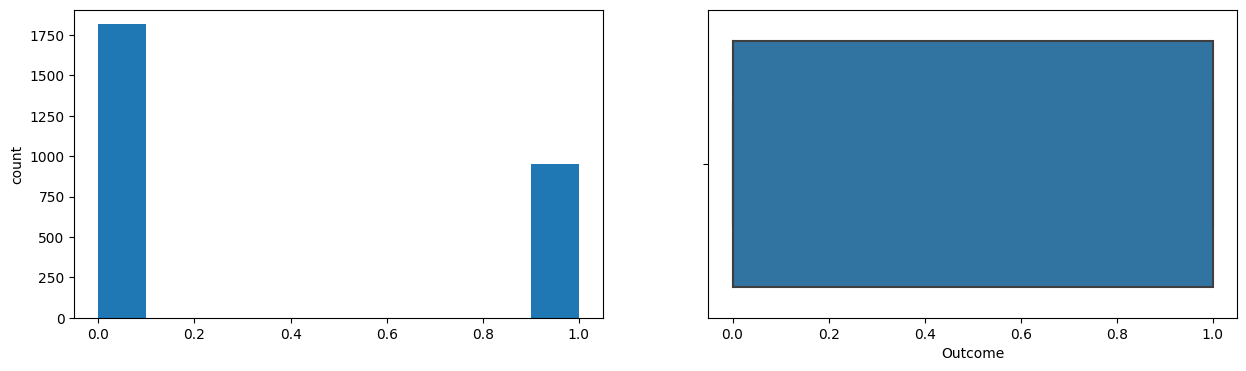

In [ ]:
for col in data:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [ ]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [ ]:
log_transform(data,['DiabetesPedigreeFunction','Insulin','BMI'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pregnancies                   2768 non-null   int64  
 1   Glucose                       2768 non-null   int64  
 2   BloodPressure                 2768 non-null   int64  
 3   SkinThickness                 2768 non-null   int64  
 4   Insulin                       2768 non-null   int64  
 5   BMI                           2768 non-null   float64
 6   DiabetesPedigreeFunction      2768 non-null   float64
 7   Age                           2768 non-null   int64  
 8   Outcome                       2768 non-null   int64  
 9   DiabetesPedigreeFunction_log  2768 non-null   float64
 10  Insulin_log                   2768 non-null   float64
 11  BMI_log                       2768 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 259.6 KB


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-13-28fefbadef75>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["DiabetesPedigreeFunction_log"], axlabel="DiabetesPedigreeFunction_log")


<Axes: xlabel='DiabetesPedigreeFunction_log', ylabel='Density'>

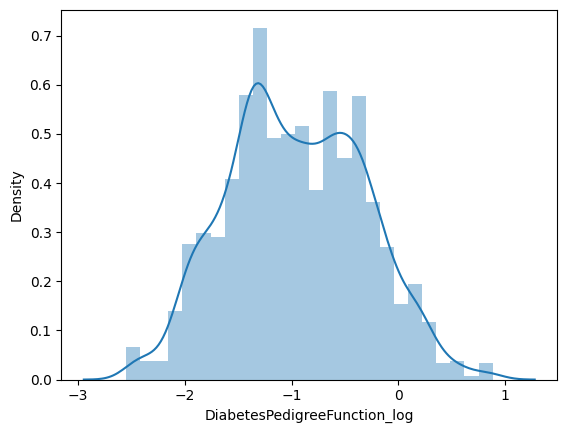

In [ ]:
sns.distplot(data["DiabetesPedigreeFunction_log"], axlabel="DiabetesPedigreeFunction_log")

Scatter Plot of 2 predictors to examine if there is any relationship

<Figure size 1300x1700 with 0 Axes>

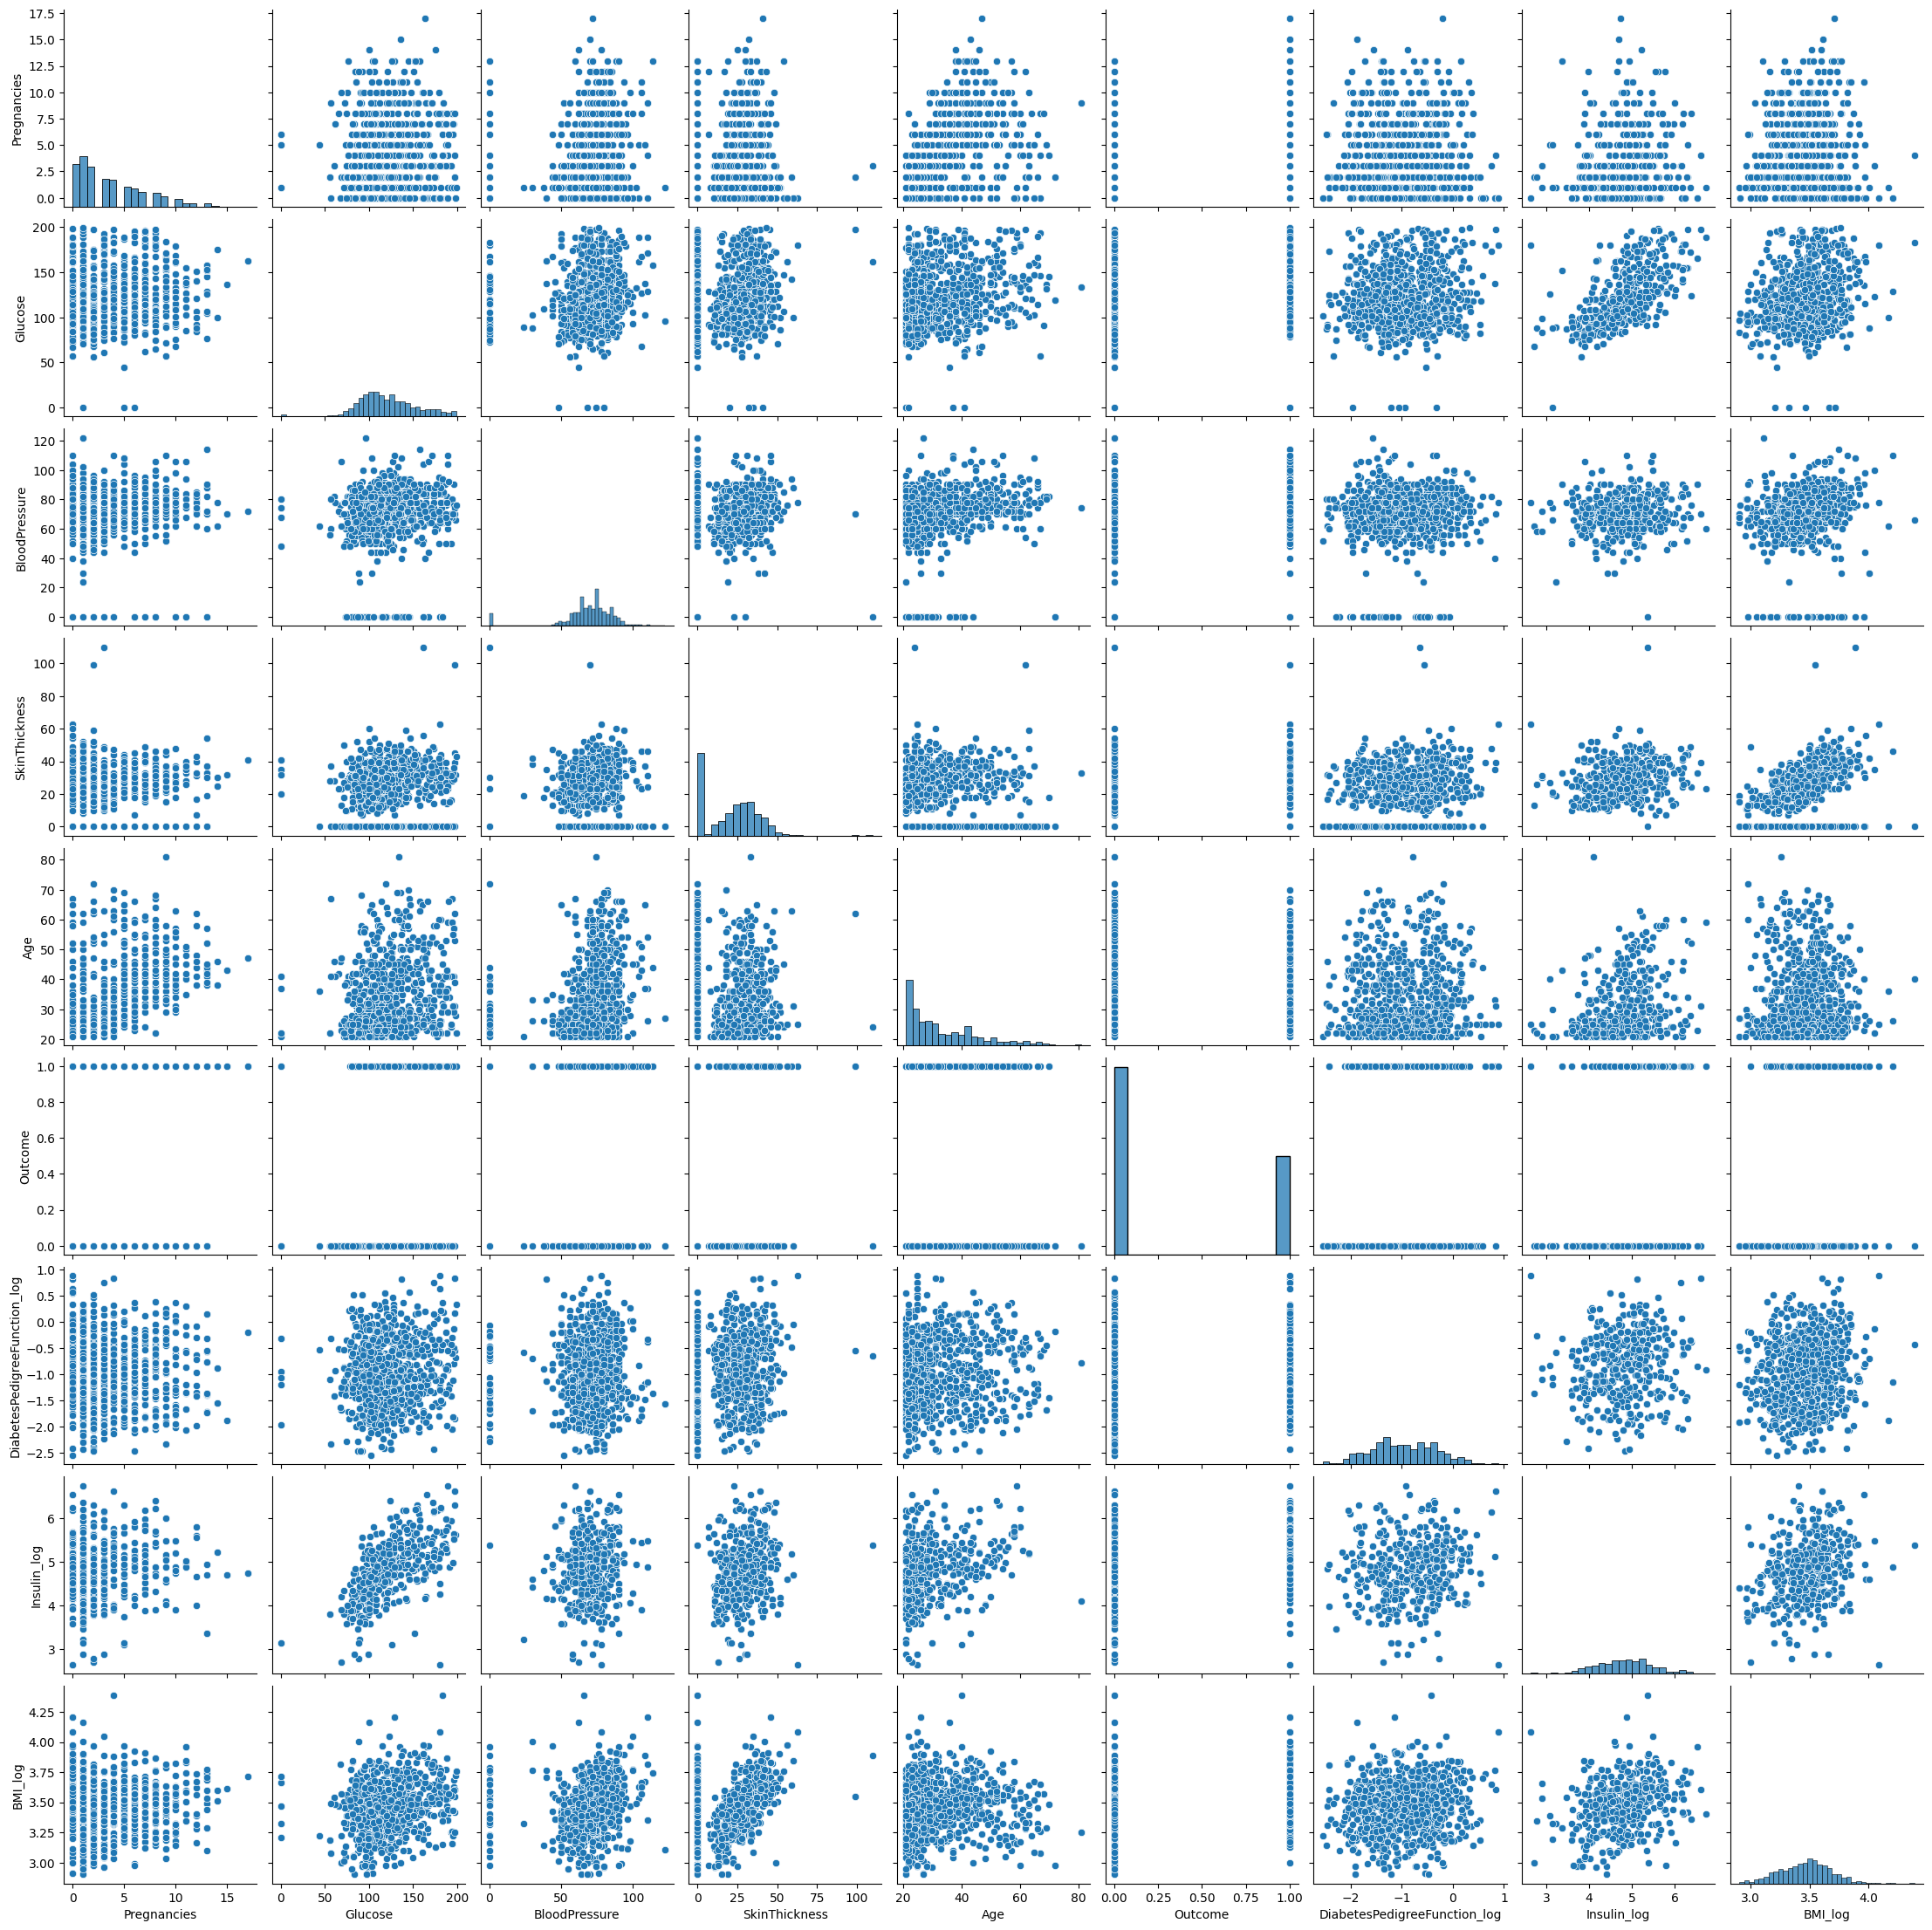

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['DiabetesPedigreeFunction','Insulin','BMI'],axis=1))
plt.show()

From the scatter plots we can see there is a positive relationship with the combinations of:

Glucose & Insulin log

Glucose & BMI log

Skin Thickness & BMI log

Insulin log & BMI log

Heat map to look at possible relatiopn ships between predictors similar to scatter plot above.

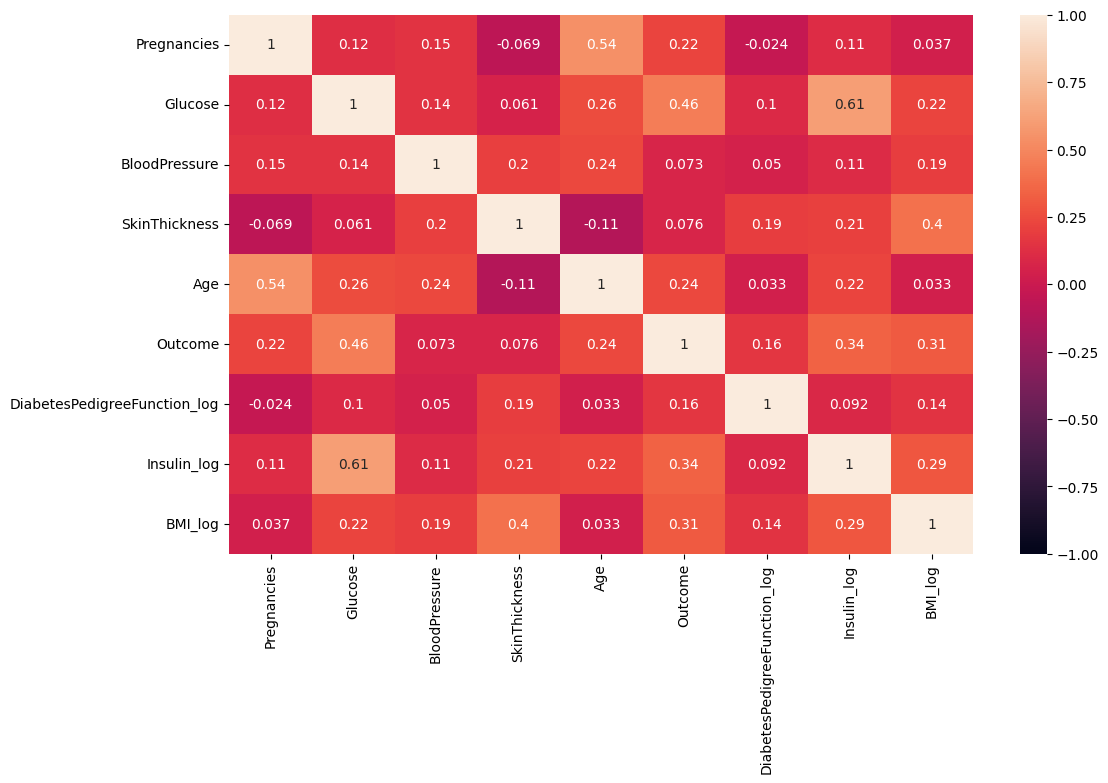

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['DiabetesPedigreeFunction','Insulin','BMI'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

We can see that there seems to be a relation ship between the followin combinations when considering if the values are above or equal to .5:

Age & Pregnanacies,

Glucose & Skin Thickness

Insulin Log & Glucose

Blood Pressure & Diabetes Pedigree Funtion log

Predictive Model